### Imports

In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('blurry3.jpg', cv2.IMREAD_GRAYSCALE)

ret, img_threshold = cv2.threshold(img1, 127,255, cv2.THRESH_BINARY)
img2 = cv2.imread('blurry4.jpg', cv2.IMREAD_GRAYSCALE)

### creating the ORB

In [3]:
orb = cv2.ORB_create()

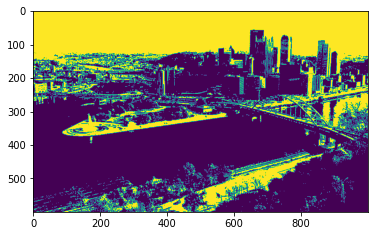

In [4]:
plt.imshow(img_threshold)

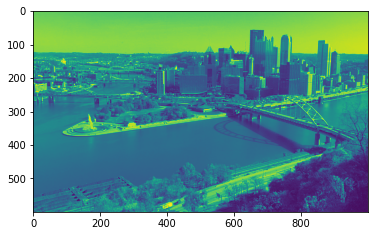

In [5]:
plt.imshow(img1)

In [6]:
kp = orb.detect(img1,None)

In [8]:
kp_, des = orb.compute(img_threshold, kp)

In [9]:
des

array([[116,  70, 221, ..., 243,  68,  32],
       [202, 174, 153, ..., 112, 175, 138],
       [191,  76, 198, ..., 245,   8, 166],
       ...,
       [158, 196, 243, ...,  46, 193, 208],
       [  0,  96,  57, ..., 130, 135, 169],
       [  1,  45, 231, ..., 131, 112, 185]], dtype=uint8)

In [10]:
des.shape

(500, 32)

In [12]:
img3 = cv2.drawKeypoints(img1, kp, None, color=(255,0,0), flags=0)

### Feature Descriptors of Pittsburgh, from top of Mount Washington

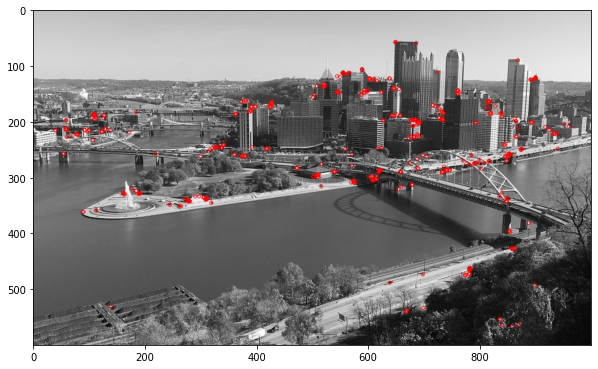

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(img3)

Similary we calculate for the New York Image

In [14]:
ret, img4 = cv2.threshold(img2, 127,255, cv2.THRESH_BINARY)

In [19]:
orb = cv2.ORB_create()

### what if the image was a colored one

In [20]:
img2 = cv2.imread('blurry4.jpg', cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [21]:
keypoint = orb.detect(img2, None)
keypoint, descriptor = orb.compute(img2,kp)

In [22]:
descriptor.shape

(500, 32)

In [23]:
img_color_brief = cv2.drawKeypoints(img2, kp, None)

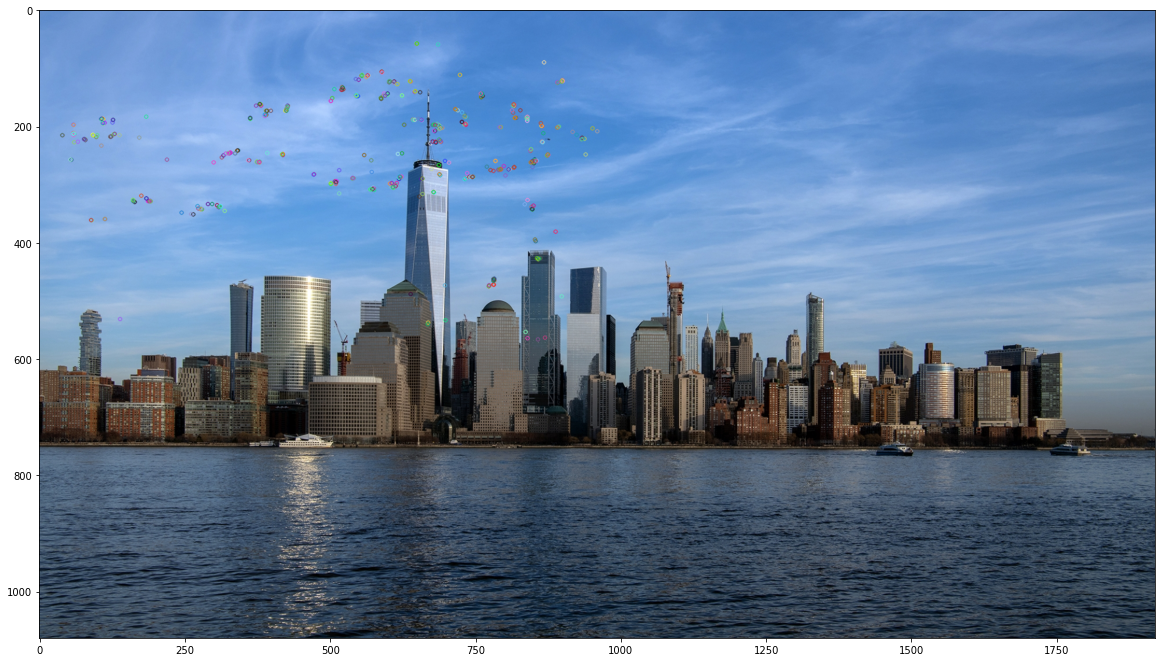

In [26]:
plt.figure(figsize= (20,20))
plt.imshow(img_color_brief)
plt.show()

## Matching Features

In [37]:
brute_force_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = brute_force_matcher.match(des, descriptor)

img_fm = cv2.drawMatches(img1,kp,img2,keypoint,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

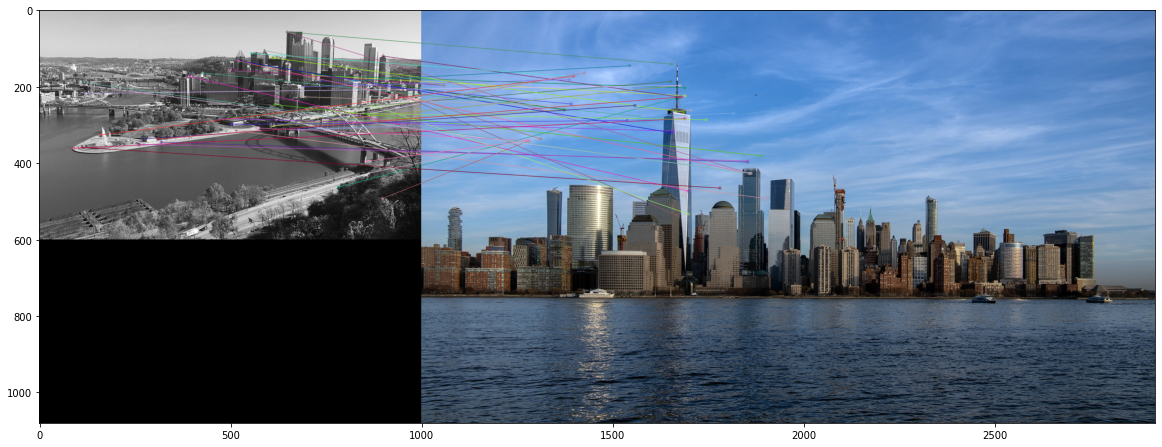

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(img_fm)

### Look at the descriptor
It clears a lot of concepts at times to take a look at the desciptors

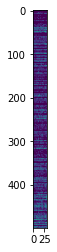

In [48]:
plt.imshow(descriptor)

### Limit the number of features to 10

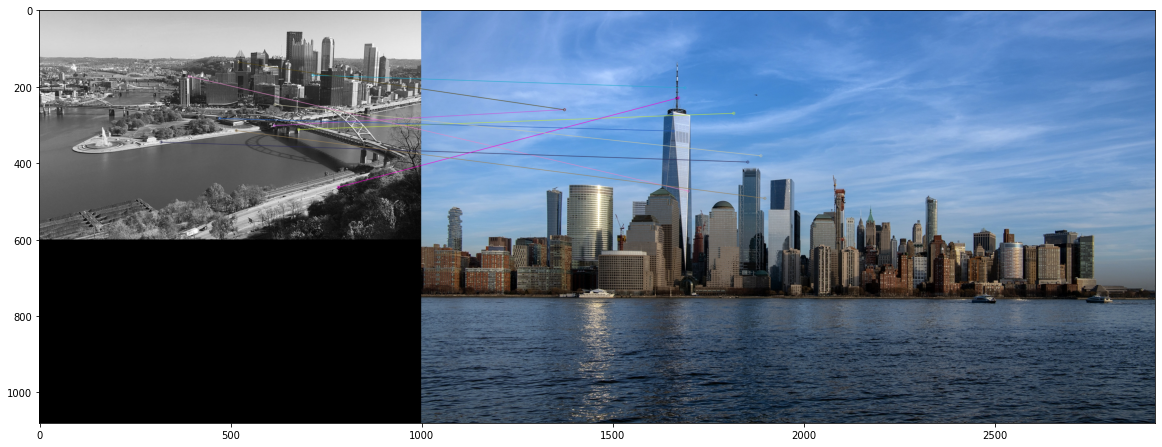

In [44]:
img_fm = cv2.drawMatches(img1,kp,img2,keypoint,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img_fm)